In [1]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [2]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse_logf (control parameters: ['p_A', 'logf', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [3]:
"""Base settings"""

directory = r'D:\parameter_studies\2_plus_1_gradient_search'#'D:\\parameter_studies\\Bubble_dynamics_simulation\\test 1'
file_base_name = 'output_'

In [4]:
"""Load all CSV files from directory into a dataframe (all_data)"""

# create a dataframe
all_data = pd.DataFrame()
num = 0
print(f'Found files:')

# iterate trough all files in directory (including subdirectories)
for (root, dirs, files) in os.walk(directory):
    for file in files:
        # ignore python rubish
        if 'ipynb_checkpoints' in root:
            continue
        # check if it's a CSV starting with file_base_name
        if file[-4:] != '.csv':
            continue
        if file[:len(file_base_name)] != file_base_name:
            continue

        # read file
        num += 1
        current_data = pd.read_csv(os.path.join(root, file))
        print(f'\t{file: <24} ({current_data.shape[0]: >4} rows)')
        all_data = pd.concat([all_data, current_data])
    
    
# Print some stats:
print(f'_______________________________________')
print(f'total number of files: {num}')
total = all_data.shape[0]
print(f'{"total:": <10} {total: < 8} rows   ( 100.00 %)')

# Print errors
def matches(error, error_code):
    errors, success = de.get_errors(error_code)
    return error in errors

for error in de.error_codes.keys():
    digit = -1; place = -1
    for i in range(10):
        if str(i) in error:
            digit = i
            place = len(error) - error.find(str(i)) - 1

    if digit < 0 and place < 0:
        print(colored(f'Error: invalid error code: {error}', 'red'))
        continue
    num = all_data.loc[(all_data['error_code'] // (10**place) % 10) == digit].shape[0]
    if error == 'x0x':
        num  -= all_data.loc[(all_data['error_code'] % 10) == 0].shape[0] # xx0
    print(f'{error + ":": <10} {num: < 8} rows   ({(100*num/total): 7.2f} %)\t' + colored(de.error_codes[error]['describtion'], de.error_codes[error]['color']))



#for error_code in range(7):
#    num = all_data.loc[(all_data['error_code'] == error_code)].shape[0]
#    print(f'error code {error_code}: {num} rows   ({(100*num/total):.2f} %)')
#num = all_data.loc[(all_data['T_max'] > 6000.0)].shape[0]
#print(f'too hot: {num} rows    ({100*num/total:.2f} %)')
print(f'_______________________________________')

Found files:
	output_1.csv             (  89 rows)
	output_10.csv            ( 115 rows)
	output_11.csv            (  99 rows)
	output_12.csv            (  95 rows)
	output_13.csv            (  87 rows)
	output_14.csv            (  92 rows)
	output_15.csv            (  97 rows)
	output_16.csv            (  85 rows)
	output_17.csv            (   7 rows)
	output_18.csv            ( 107 rows)
	output_19.csv            ( 135 rows)
	output_2.csv             (  87 rows)
	output_20.csv            ( 112 rows)
	output_21.csv            ( 100 rows)
	output_22.csv            (  87 rows)
	output_23.csv            (  82 rows)
	output_24.csv            (  90 rows)
	output_25.csv            (  90 rows)
	output_26.csv            (  80 rows)
	output_27.csv            (  90 rows)
	output_28.csv            (   0 rows)
	output_29.csv            (  90 rows)


C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-

	output_3.csv             (  87 rows)
	output_30.csv            (  80 rows)
	output_31.csv            (  88 rows)
	output_32.csv            (  92 rows)
	output_33.csv            ( 125 rows)
	output_34.csv            (  87 rows)
	output_35.csv            (  90 rows)
	output_36.csv            (  77 rows)
	output_37.csv            ( 157 rows)
	output_38.csv            (  91 rows)
	output_39.csv            (  90 rows)
	output_4.csv             ( 105 rows)
	output_40.csv            (  96 rows)
	output_41.csv            (  75 rows)
	output_42.csv            (  97 rows)
	output_43.csv            (  92 rows)
	output_44.csv            (  80 rows)
	output_45.csv            (  89 rows)
	output_46.csv            (  92 rows)
	output_47.csv            ( 100 rows)
	output_48.csv            ( 105 rows)
	output_49.csv            ( 104 rows)
	output_5.csv             ( 110 rows)
	output_50.csv            (  57 rows)
	output_6.csv             (  85 rows)
	output_7.csv             (  90 rows)
	output_8.cs

C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-

	output_22.csv            ( 142 rows)
	output_23.csv            (  82 rows)
	output_24.csv            ( 182 rows)
	output_25.csv            (  84 rows)
	output_26.csv            ( 143 rows)
	output_27.csv            ( 165 rows)
	output_28.csv            (  82 rows)
	output_29.csv            (   0 rows)
	output_3.csv             (  73 rows)
	output_30.csv            ( 164 rows)
	output_31.csv            (  76 rows)
	output_32.csv            (  81 rows)
	output_33.csv            (   0 rows)
	output_34.csv            ( 167 rows)
	output_35.csv            (  69 rows)
	output_36.csv            (  76 rows)
	output_37.csv            ( 187 rows)
	output_38.csv            ( 179 rows)
	output_39.csv            ( 171 rows)
	output_4.csv             (  76 rows)
	output_40.csv            (  91 rows)
	output_41.csv            (  77 rows)
	output_42.csv            ( 185 rows)
	output_43.csv            ( 166 rows)
	output_44.csv            (  86 rows)
	output_45.csv            (  83 rows)
	output_46.c

C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-

	output_1.csv             ( 184 rows)
	output_10.csv            ( 262 rows)
	output_11.csv            ( 213 rows)
	output_12.csv            ( 213 rows)
	output_13.csv            ( 135 rows)
	output_14.csv            ( 170 rows)
	output_15.csv            ( 198 rows)
	output_16.csv            ( 156 rows)
	output_17.csv            ( 212 rows)
	output_18.csv            ( 227 rows)
	output_19.csv            ( 375 rows)
	output_2.csv             ( 142 rows)
	output_20.csv            ( 191 rows)
	output_21.csv            ( 100 rows)
	output_22.csv            ( 445 rows)


C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-

	output_23.csv            ( 339 rows)
	output_24.csv            ( 318 rows)
	output_25.csv            ( 354 rows)
	output_26.csv            ( 128 rows)
	output_27.csv            ( 213 rows)
	output_28.csv            (  93 rows)
	output_29.csv            ( 297 rows)
	output_3.csv             ( 276 rows)
	output_30.csv            ( 149 rows)
	output_4.csv             ( 347 rows)
	output_5.csv             ( 191 rows)
	output_6.csv             ( 184 rows)
	output_7.csv             ( 227 rows)


C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-

	output_8.csv             ( 310 rows)
	output_9.csv             ( 339 rows)
_______________________________________
total number of files: 130
total:      17443   rows   ( 100.00 %)
xx0:        16850   rows   (  96.60 %)	succecfully solved with LSODA solver
xx1:        124     rows   (   0.71 %)	LSODA solver didn't converge
xx2:        467     rows   (   2.68 %)	LSODA solver timed out
xx3:        2       rows   (   0.01 %)	LSODA solver had a fatal error
x0x:        459     rows   (   2.63 %)	succecfully solved with Radau solver
x4x:        134     rows   (   0.77 %)	Radau solver didn't converge (NO SOLUTION!)
x5x:        0       rows   (   0.00 %)	Radau solver timed out (NO SOLUTION!)
x6x:        0       rows   (   0.00 %)	Radau solver had a fatal error (NO SOLUTION!)
1xx:        0       rows   (   0.00 %)	Low pressure error: The pressure of the gas is negative
2xx:        0       rows   (   0.00 %)	Low pressure warning: The pressure during the expansion is lower, than the saturated wa

C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])
C:\Users\aron\AppData\Local\Temp\ipykernel_21940\2259840411.py:24: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  all_data = pd.concat([all_data, current_data])


In [5]:
"""Locate valid (good_data) and wrong (wrong_data) simulations"""

# Get valid datas
good_data = all_data.loc[
    (all_data['error_code'] % 100 <= 3) & ((all_data['error_code'] // 100) % 10 != 1) &
    (all_data['energy_efficiency'] > 0.0) & (all_data['energy_efficiency'] == all_data['energy_efficiency']) # positive not NaN
    # or set negative energy to inf: good_data.loc[good_data['energy'] < 0.0, 'energy'] = 1e10
]

# Everything that's not in good_data
wrong_data = pd.concat([good_data, all_data]).drop_duplicates(keep=False)

# Sort by energy
good_data = good_data.sort_values(['energy_efficiency'], ascending=True)

# New column
good_data['logE'] = np.log10(good_data['energy_efficiency'])
print(f'Good data: {good_data.shape[0]} rows ({100*good_data.shape[0]/all_data.shape[0]: .2f} %)')

Good data: 17309 rows ( 99.23 %)


In [6]:
"""Let's see the dataframe"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args]

,ID,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,gases,fractions,...,steps,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency,p_A,logf,n
144,0,0.000079,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12252,0.000063,4756.750755,7.972166e-13,0.0,1.180244e-05,8.692908e+02,-187833.329399,4.111358,1.0
139,0,0.000079,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12367,0.000063,4757.258674,7.975379e-13,0.0,1.180727e-05,8.692964e+02,-187853.294039,4.111364,1.0
137,0,0.000079,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12388,0.000063,4757.244326,7.975795e-13,0.0,1.180789e-05,8.692967e+02,-187855.320539,4.111364,1.0
143,0,0.000079,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12197,0.000063,4757.380305,7.976222e-13,0.0,1.180852e-05,8.692967e+02,-187855.320539,4.111354,1.0
138,0,0.000079,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,12516,0.000063,4757.375980,7.975677e-13,0.0,1.180772e-05,8.692972e+02,-187855.320539,4.111364,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,0,0.000128,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,4094,0.000024,378.193148,5.180724e-53,0.0,2.328926e-07,2.639581e+41,-256515.698554,4.993932,1.0
67,0,0.000137,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,4414,0.000025,370.403924,2.050135e-53,0.0,2.306059e-07,6.604771e+41,-259629.872907,4.993932,1.0
48,0,0.000352,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,8392,0.000062,363.585587,1.363909e-52,0.0,2.282864e-06,9.827983e+41,-303995.265000,4.673971,1.0
37,0,0.000001,1.0,101325.0,0.35,303.15,4245.125716,0.000815,11 1,0.25 0.75,...,4034,0.000007,303.238310,1.733926e-135,0.0,8.802204e-15,2.980786e+116,-101302.708500,5.034072,1.0


In [7]:
"""Print some statistics"""

good_data[['ID', 'R_E', 'ratio', 'P_amb', 'alfa_M', 'T_inf', 'P_v', 'mu_L', 'gases', 'fractions', 'surfactant', 'elapsed_time', 'steps', 'collapse_time', 'T_max', f'n_{de.target_specie}', 'expansion_work', 'dissipated_acoustic_energy', 'energy_efficiency'] + de.excitation_args].describe()

,R_E,ratio,P_amb,alfa_M,T_inf,P_v,mu_L,surfactant,elapsed_time,collapse_time,T_max,n_NH3,expansion_work,dissipated_acoustic_energy,energy_efficiency,p_A,logf,n
count,17309.000000,17309.0,17309.0,1.730900e+04,17309.00,17309.000000,1.730900e+04,17309.0,17309.000000,17309.000000,17309.000000,1.730900e+04,17309.0,1.730900e+04,1.730900e+04,17309.000000,17309.000000,17309.0
mean,0.000375,1.0,101325.0,3.500000e-01,303.15,4245.125716,8.148612e-04,1.0,4.611824,0.000072,1473.114757,1.471787e-13,0.0,7.806396e-06,2.535654e+114,-201892.762266,4.737127,1.0
std,0.000285,0.0,0.0,5.551275e-17,0.00,0.000000,2.168467e-19,0.0,6.504028,0.000039,1903.036534,5.510303e-13,0.0,2.098426e-05,3.313419e+116,65948.640564,0.473020,0.0
min,0.000001,1.0,101325.0,3.500000e-01,303.15,4245.125716,8.148612e-04,1.0,0.270842,0.000005,303.163269,-1.204711e-20,0.0,8.778695e-15,8.692908e+02,-323531.413995,4.000100,1.0
25%,0.000091,1.0,101325.0,3.500000e-01,303.15,4245.125716,8.148612e-04,1.0,1.637105,0.000036,306.763811,-9.542033e-36,0.0,3.382899e-08,5.654896e+16,-257126.874835,4.369070,1.0
50%,0.000350,1.0,101325.0,3.500000e-01,303.15,4245.125716,8.148612e-04,1.0,3.283305,0.000071,367.261666,4.105908e-36,0.0,5.621070e-07,1.556083e+25,-207123.485726,4.657576,1.0
75%,0.000636,1.0,101325.0,3.500000e-01,303.15,4245.125716,8.148612e-04,1.0,4.767618,0.000109,1193.180615,5.584180e-31,0.0,7.256750e-06,1.000000e+30,-151423.587984,5.019846,1.0
max,0.001000,1.0,101325.0,3.500000e-01,303.15,4245.125716,8.148612e-04,1.0,59.019258,0.000162,7155.153252,6.682985e-12,0.0,2.847853e-04,4.359155e+118,-86376.075876,5.978836,1.0


succecfully solved with LSODA solver


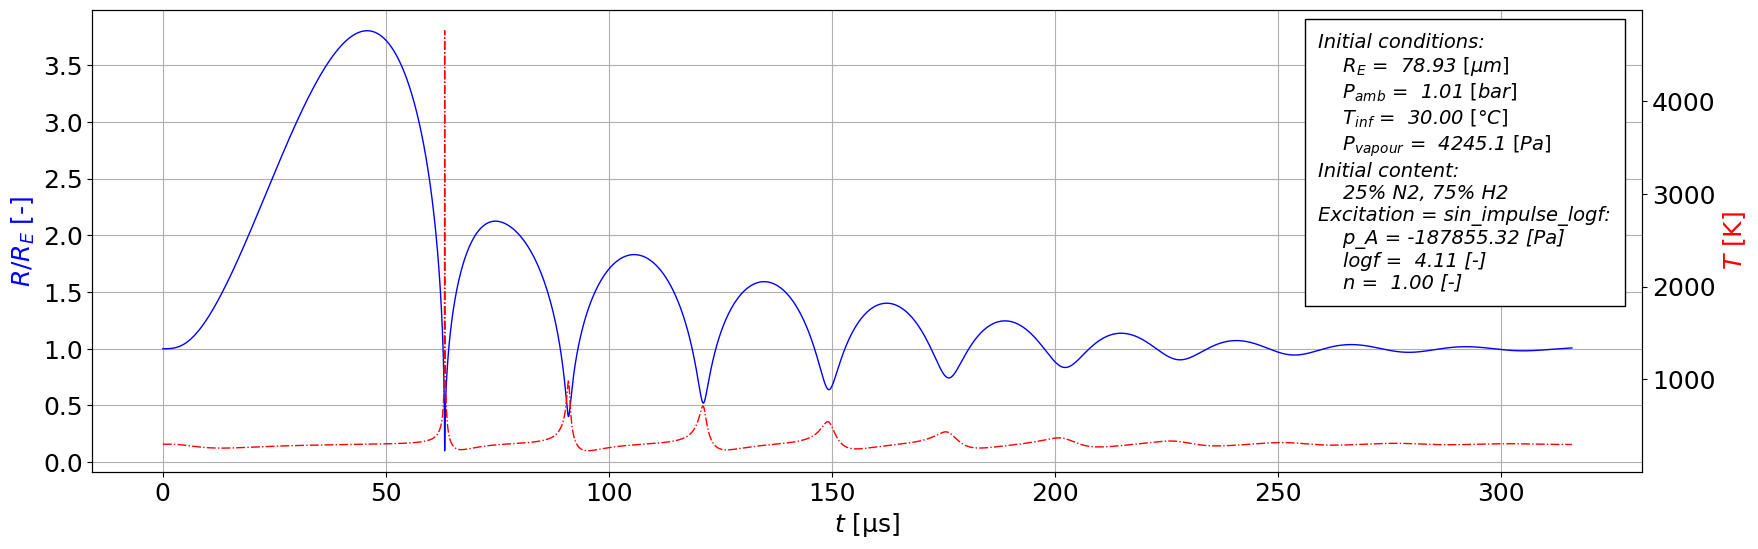

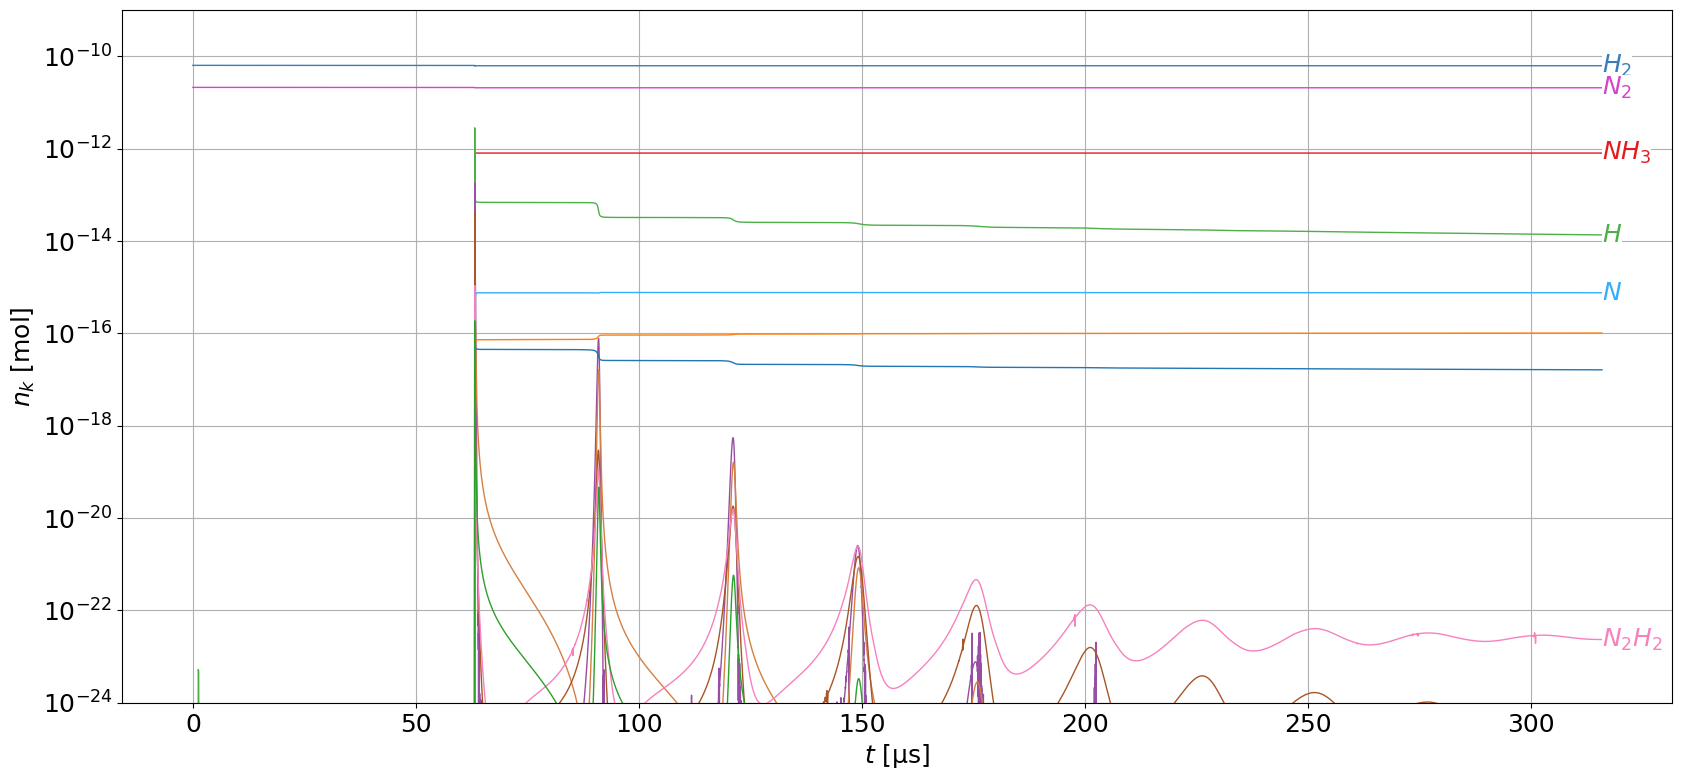

Control parameters:
    ID = 0
    R_E = 78.93 [um]
    ratio = 1.00 [-]
    P_amb = 1.01 [bar]
    alfa_M = 0.35 [-]
    T_inf = 30.00 [°C]
    P_v = 4245.13 [Pa]
    mu_L = 0.81 [mPa*s]
    surfactant = 1.00 [-]    
    excitation = 'sin_impulse_logf'
    (p_A =-187855.32 [Pa]; logf = 4.11 [-]; n = 1.00 [-])
    Initial content: 25% N2, 75% H2
Simulation info:
    error_code = 0 (success = True)
    elapsed_time = 1.07 [s]
    steps = 12299 [-]
Final state:
    R_final = 78.68 [um];   R_dot_final =-3.751951796564479e-12 [m/s];   T_final = 303.15 [K]
    n_NH3_final = 7.98e-13 [mol]
    Final molar concentrations: [mol/cm^3]
        NH3   :    3.908786042231256e-07;    H2    :    3.040109382839313e-05;    H     :  -4.2685997117564414e-14;    NH2   :  -2.5681424227743764e-15;    
        NH    :   1.0687270317403018e-21;    N     :    7.302978694942912e-12;    NNH   :   -3.249586402381337e-22;    N2H4  :    3.327439818416204e-12;    
        N2H3  :    5.421410902245552e-11;    N2H2  :

In [8]:
"""Plot a certain simulation"""

# converts a line of all_data to a dictionary containing the control parameters (cpar)
def line_to_dict(line):
    # check 'full_bubble_model.py' settings
    if (de.enable_heat_transfer != line['enable_heat_transfer'] or
        de.enable_evaporation != line['enable_evaporation'] or
        de.enable_reactions != line['enable_reactions'] or
        de.enable_dissipated_energy != line['enable_dissipated_energy'] or
        de.target_specie != line['target_specie'] or
        de.excitation_type != line['excitation_type']):
        print(colored(f'Error: the settings of \'full_bubble_model.py\' do not match the current settings', 'red'))

    gases = str(line['gases'])
    gases = [int(index) for index in gases.split(' ') if index != '']
    fractions = str(line['fractions'])
    fractions = [float(frac) for frac in fractions.split(' ') if frac != '']

    cpar = de.dotdict(dict(
        ID = line['ID'],                  # ID of control parameter (not used during calculation)
    # Initial conditions:
        R_E = line['R_E'],                # bubble equilibrium radius [m]
        ratio = line['ratio'],            # initial radius / equilibrium radius R_0/R_E [-]
        gases = gases,                    # indexes of species in initial bubble (list of species indexes)
        fractions = fractions,            # molar fractions of species in initial bubble (list of fractions for every gas)
    # Ambient parameters:
        P_amb = line['P_amb'],            # ambient pressure [Pa]
        T_inf = line['T_inf'],            # ambient temperature [K]
    # Liquid parameters:
        alfa_M = line['alfa_M'],          # water accommodation coefficient [-]
        P_v = line['P_v'],                # vapour pressure [Pa]
        mu_L = line['mu_L'],              # dynamic viscosity [Pa*s]
        c_L = line['c_L'],                # sound speed [m/s]
        surfactant = line['surfactant'],  # surfactant (surface tension modfier) [-]
    ))

    # Excitation parameters:
    for arg in de.excitation_args:
        cpar[arg] = line[arg]

    return cpar

cpar = line_to_dict(good_data.iloc[5])   # choose the most energy efficient one
de.plot(cpar, show_legend=False)